In [3]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [4]:
env = BlackjackEnv()

In [5]:
defaultdict(float)

defaultdict(float, {})

In [14]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    time_steps = 100
    
    # Implement this!
    for eps_i in range(num_episodes):
        state = env.reset()
        traj = []
        
        # generate the traj for episode 
        for t in range(time_steps):
            action = policy(state)
            next_state, reward, done, info = env.step(action)
            
            traj.append([state, action, reward, next_state])
            
            state = next_state 
            
            if done:
                break
        
        # update value using this completed episode 
        states_encountered = [i[0] for i in traj] 
        visited = defaultdict(float)
        """
        # this implements first visit MC 
        for state in states_encountered:
            g = 0
            if visited[state] != 1:
                for i in range(len(traj)): 
                    g += discount_factor ** i * traj[i][2]
                
                returns_count[state] += 1
                returns_sum[state] += g 
                V[state] = returns_sum[state]/returns_count[state]
                visited[state] = 1
        """        
        # this implements every visit MC 
        for state in states_encountered:
            g = 0
            for i in range(len(traj)): 
                g += discount_factor ** i * traj[i][2]

            returns_count[state] += 1
            returns_sum[state] += g 
            V[state] = returns_sum[state]/returns_count[state]

    return V

In [12]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

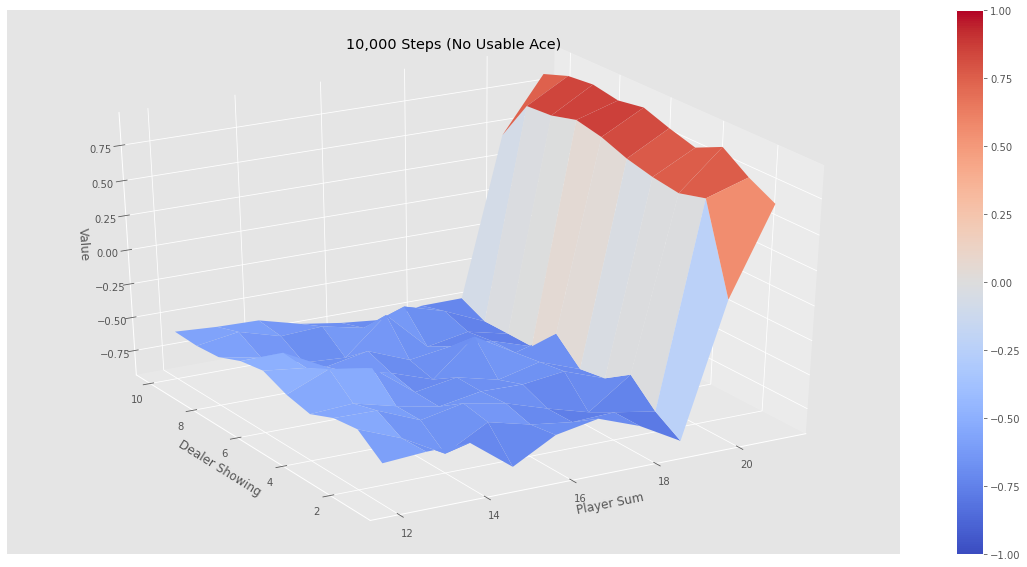

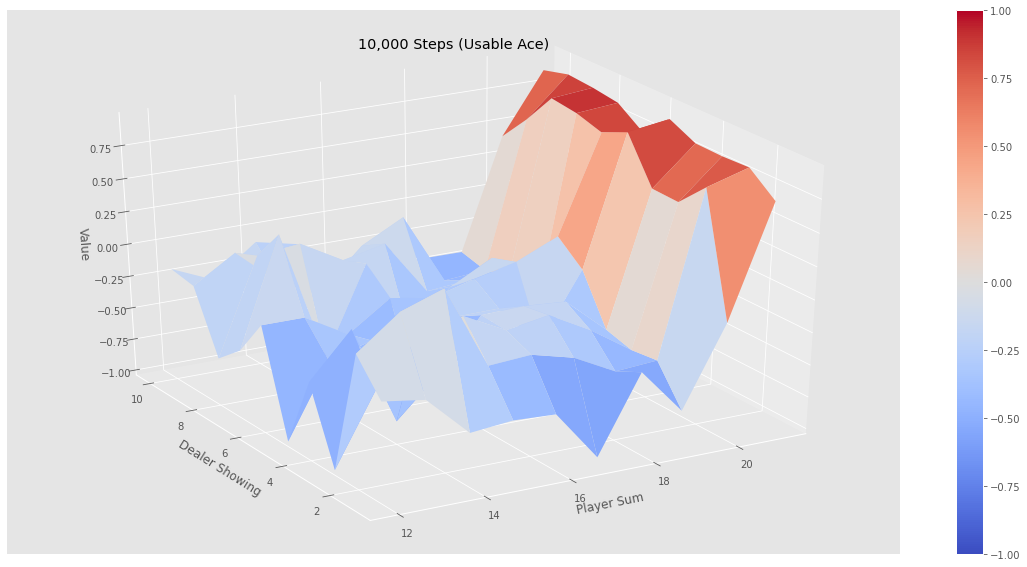

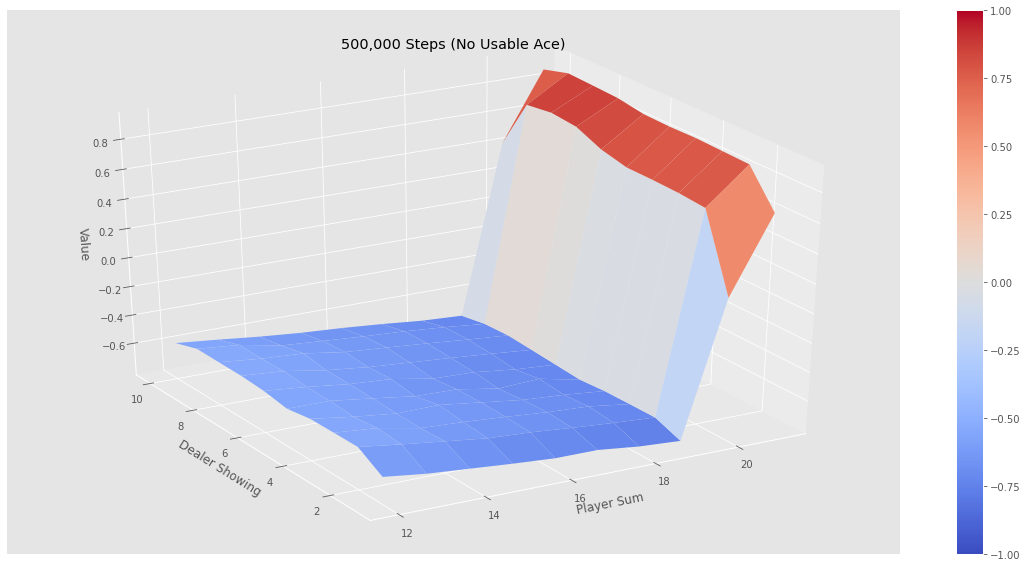

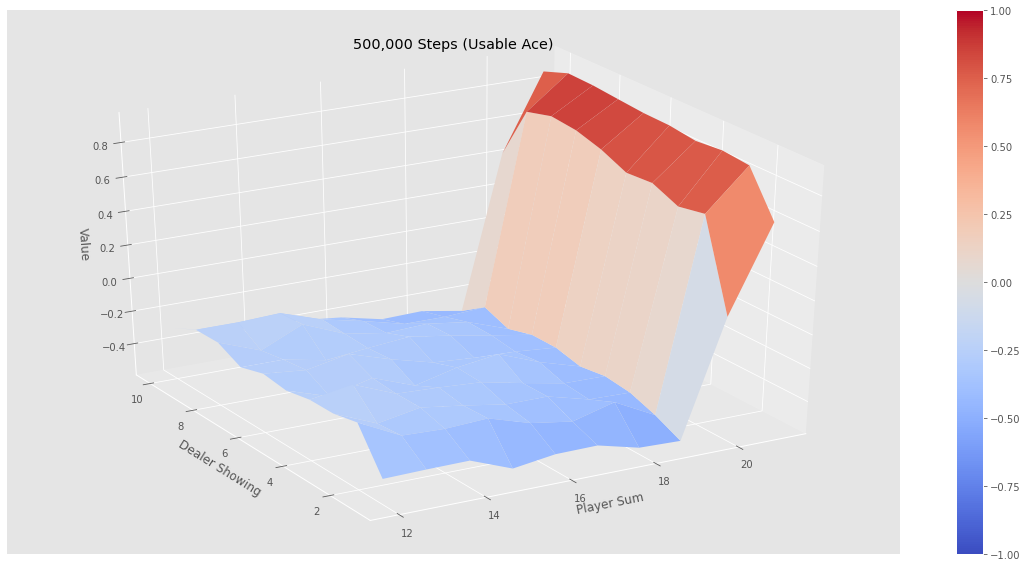

In [15]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")